In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
def generate_time_series(m, n_seq):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4,m,1)
    time = np.linspace(0, 1, n_seq)
    series = 0.5 *np.cos((time-offsets1) * (freq1 * 10 + 10))
    series += 0.3 *np.sin((time-offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(m, n_seq)-0.5)
    return series[..., np.newaxis].astype(np.float32)

In [4]:
np.random.seed(1)
n_seq = 30
n_pred = 10

series = generate_time_series(5000, n_seq+n_pred)
series.shape

(5000, 40, 1)

In [5]:
x_train, y_train = series[:3000, : n_seq], series[:3000, -n_pred: ,0]
x_valid, y_valid = series[3000:4000, :n_seq], series[3000:4000, -n_pred:,0]
x_test, y_test = series[4000:, :n_seq], series[4000:, -n_pred:,0]

In [6]:
x_train.shape, y_train.shape

((3000, 30, 1), (3000, 10))

In [7]:
def plot_seq(x, y, y_pred=None):
    plt.plot(x, '.-')
    n_seq = x.shape[0]
    ahead = y.shape[0]
    plt.plot(np.arange(n_seq, n_seq+ahead), y, 'go-', label='$y$')
    if y_pred is not None:
        plt.plot(np.arange(n_seq, n_seq+ahead), y_pred, 'rx-',
                label='$\hat y$', markersize=10)
    plt.hlines(0, 0, n_seq + ahead, linewidth = 1)
    plt.axis([0, n_seq +ahead, -1, 1])
    plt.grid(True)
    plt.legend(fontsize=14)

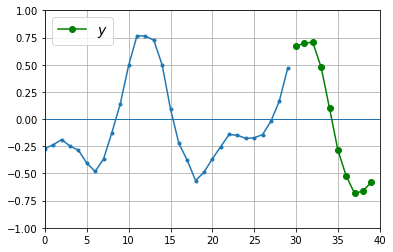

In [8]:
plot_seq(x_test[0,:,0], y_test[0])

<font size=4>__**建構Sequence to vector的模型**__</font>

In [9]:
np.random.seed(1)
tf.random.set_seed(1)

In [10]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 20)          440       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='mse', optimizer='adam')

In [13]:
train = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
94/94 [==============================] - 4s 12ms/step - loss: 0.1562 - val_loss: 0.0943
Epoch 2/20
94/94 [==============================] - 1s 9ms/step - loss: 0.0801 - val_loss: 0.0733
Epoch 3/20
94/94 [==============================] - 1s 8ms/step - loss: 0.0653 - val_loss: 0.0605
Epoch 4/20
94/94 [==============================] - 1s 9ms/step - loss: 0.0571 - val_loss: 0.0541
Epoch 5/20
94/94 [==============================] - 1s 9ms/step - loss: 0.0503 - val_loss: 0.0469
Epoch 6/20
94/94 [==============================] - 1s 9ms/step - loss: 0.0452 - val_loss: 0.0462
Epoch 7/20
94/94 [==============================] - 1s 9ms/step - loss: 0.0414 - val_loss: 0.0422
Epoch 8/20
94/94 [==============================] - 1s 10ms/step - loss: 0.0383 - val_loss: 0.0405
Epoch 9/20
94/94 [==============================] - 1s 9ms/step - loss: 0.0363 - val_loss: 0.0382
Epoch 10/20
94/94 [==============================] - 1s 9ms/step - loss: 0.0362 - val_loss: 0.0355
Epoch 11/20
94/94

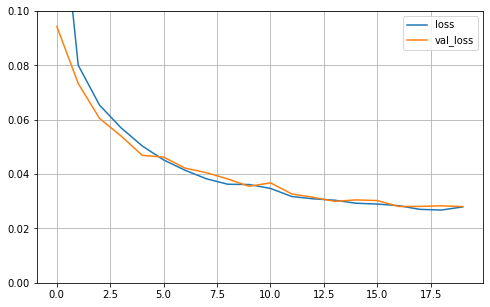

In [14]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,0.1)
plt.show()

In [15]:
model.evaluate(x_test,y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.0272


0.027241723611950874

In [16]:
y_pred = model.predict(x_test)

32/32 [==============================] - 0s 3ms/step


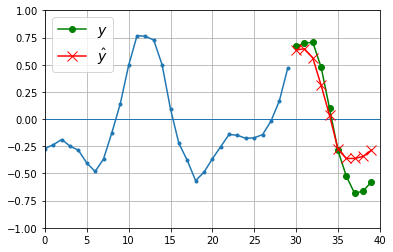

In [17]:
i = 0
plot_seq(x_test[i, :, 0], y_test[i], y_pred[i])

<font size=4>__**Sequence to Sequence Networks**__</font>


In [19]:
np.random.seed(1)
n_seq = 30
n_pred = 10

series = generate_time_series(5000, n_seq+n_pred)
series.shape

(5000, 40, 1)

In [20]:
x_train = series[:3000, :n_seq]
x_valid = series[3000:4000, :n_seq]
x_test = series[4000:, :n_seq]

In [21]:
y = np.empty((5000, n_seq, n_pred))

for step_ahead in range(1, n_pred + 1):
    y[..., step_ahead -1] = series[..., step_ahead: step_ahead +n_seq, 0]

y_train = y[:3000]
y_valid = y[3000:4000]
y_test = y[4000:]

In [22]:
x_train.shape, y_train.shape

((3000, 30, 1), (3000, 30, 10))

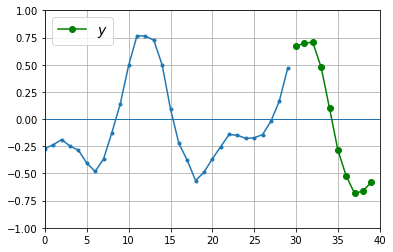

In [24]:
plot_seq(x_test[0, : ,0], y_test[0,-1])

In [25]:
np.random.seed(1)
tf.random.set_seed(1)

In [32]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 time_distributed_3 (TimeDis  (None, None, 10)         210       
 tributed)                                                       
                                                                 
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


In [34]:
def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:,-1], y_pred[:,-1])

model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.01),
             metrics=[last_time_step_mse])

In [35]:
train = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid,y_valid))

Epoch 1/20
94/94 [==============================] - 3s 13ms/step - loss: 0.0975 - last_time_step_mse: 0.0880 - val_loss: 0.0813 - val_last_time_step_mse: 0.0709
Epoch 2/20
94/94 [==============================] - 1s 9ms/step - loss: 0.0769 - last_time_step_mse: 0.0602 - val_loss: 0.0724 - val_last_time_step_mse: 0.0552
Epoch 3/20
94/94 [==============================] - 1s 9ms/step - loss: 0.0698 - last_time_step_mse: 0.0499 - val_loss: 0.0708 - val_last_time_step_mse: 0.0505
Epoch 4/20
94/94 [==============================] - 1s 11ms/step - loss: 0.0675 - last_time_step_mse: 0.0486 - val_loss: 0.0676 - val_last_time_step_mse: 0.0581
Epoch 5/20
94/94 [==============================] - 1s 10ms/step - loss: 0.0631 - last_time_step_mse: 0.0433 - val_loss: 0.0590 - val_last_time_step_mse: 0.0349
Epoch 6/20
94/94 [==============================] - 1s 10ms/step - loss: 0.0588 - last_time_step_mse: 0.0371 - val_loss: 0.0551 - val_last_time_step_mse: 0.0294
Epoch 7/20
94/94 [==================

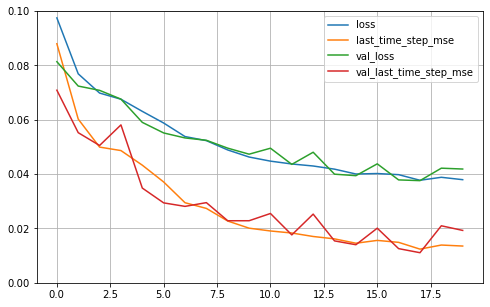

In [36]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,0.1)
plt.show()

In [38]:
model.evaluate(x_test,y_test)

32/32 [==============================] - 0s 4ms/step - loss: 0.0410 - last_time_step_mse: 0.0186


[0.040984537452459335, 0.01862386241555214]

In [39]:
y_pred = model.predict(x_test)

32/32 [==============================] - 0s 3ms/step


In [40]:
y_test.shape, y_pred.shape

((1000, 30, 10), (1000, 30, 10))

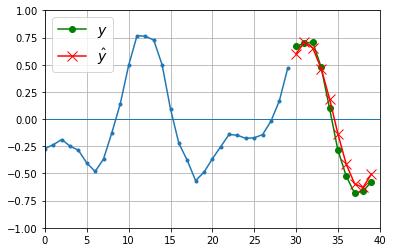

In [41]:
i = 0
plot_seq(x_test[i, : ,0], y_test[i,-1], y_pred[i,-1])